In [7]:
from IPython.display import Image

# Exploratory Sequence Analysis in Linux and R

## Andrew Timms 

### 10/21/21

![](https://miro.medium.com/max/2000/1*lN-i64QV-pJsfHSMV838ew.png)


## resources and setting up Juypter notebook

1. log onto cyberton

2. copy files you need to your home directory: 

* class data is at /gpfs/class-info/hts_class1/1020/data

> cp -r /gpfs/class-info/hts_class1/1020/data ~/esa_class1

> cd esa_class1

> ls


3. notebook also on confluence page https://confluence.childrens.sea.kids/pages/viewpage.action?pageId=1198852321

4. start interactive session, Jupyter lab and load notebook

## Juypter notebook tutorials

__online tutorials:__

https://www.dataquest.io/blog/jupyter-notebook-tutorial/

https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook

__types of cell:__

markdown: where to write text, add images, links etc..

code: can execute python or R code depending on kernal used

run cells to execute code or display text

## how to follow along with examples

* within the Juypter notebook

* Juypter terminal

* OnDemand terminal

* terminal on local computer

* launch interactive job
    * via terminal

    > qsub -Iq freeq -l mem=16gb,ncpus=1 -P your project code
    
    * add project code to launch Juypter notebook



## 10x library prep

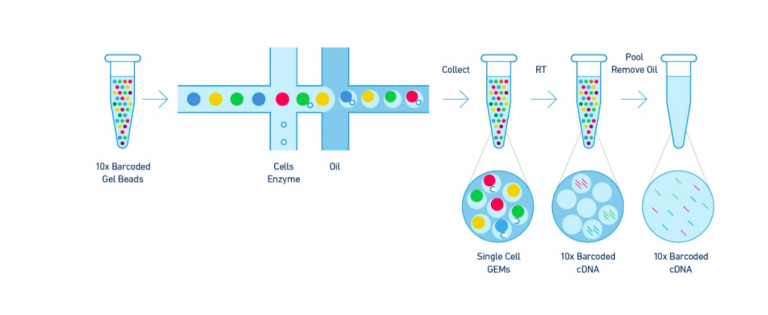

In [8]:
Image(filename = "/gpfs/class-info/hts_class1/1020/images/Selection_032-768x315.png", width = 600)

1. GEM Generation & Barcoding
* 3’ digital gene expression profiling of 500 – 10,000 individual cells per sample
* pool of ~ 750,000 barcodes to separately index each cell’s transcriptome
* partitions thousands of cells into nanoliter-scale Gel Bead-In-EMulsions (GEMs)
* cells are delivered at a limiting dilution, so that the majority (~90- 99%) of generated GEMs contains no cell, while the remainder largely contain a single cell
* GEM contains an Illumina R1 sequence, a 16 bp 10x Barcode,a 10 bp randomer and poly-dT primer sequence are released and mixed with cell lysate and master mix

2. Post GEM-RT Cleanup & cDNA Amplification
* silane magnetic beads are used to remove leftover biochemical reagents and primers from the post GEM reaction mixture
* full-length, barcoded cDNA is then amplified by PCR to generate sufficient mass for library construction

3. Library Construction
* enzymatic Fragmentation and Size Selection are used to optimize the cDNA amplicon size prior to library construction
* P5, P7, a sample index and R2 sequence are added during library construction via End Repair, A-tailing, Adaptor Ligation and PCR


## 10x barcoding

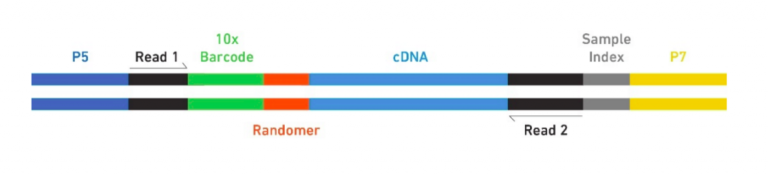

In [10]:
Image(filename = "/gpfs/class-info/hts_class1/1020/images/Selection_033-768x175.png", width = 800)

## Illumina sequencing

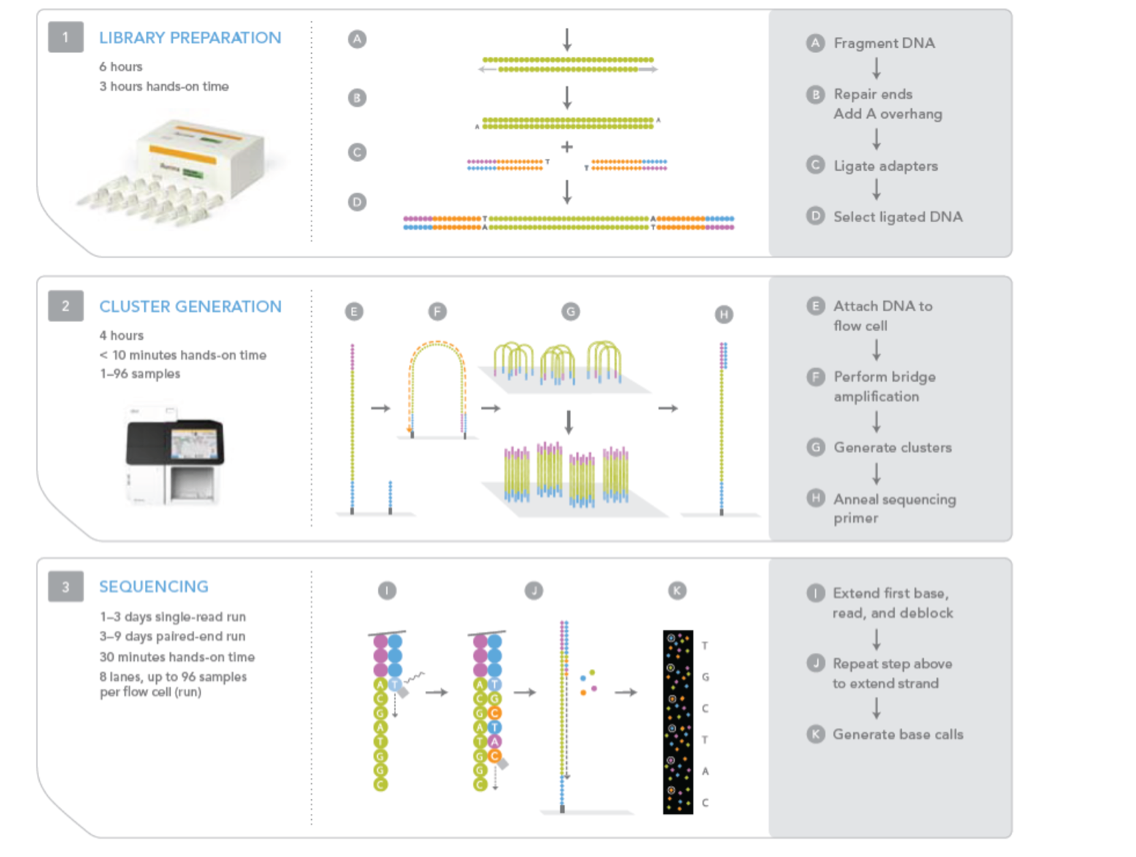

In [11]:
Image(filename = "/gpfs/class-info/hts_class1/1020/images/ill_seq.png", width = 900)

4. Sequencing Libraries
* single cell 3’ Protocol produces Illumina-ready sequencing libraries
* standard Illumina paired-end constructs which begin and end with P5 and P7
* 16 bp 10x barcode and 10 bp randomer is encoded in Read 1
* read 2 contains the cDNA sequence information
* sample index sequences are incorporated as the i7 index read

## other single cell RNA-Seq technologies

* __sci-RNA-seq__
    * uses combinatorial cellular indexing, captures transcriptomes for tens of thousands of cells in a single experiment for a fraction of the cost of alternative methods

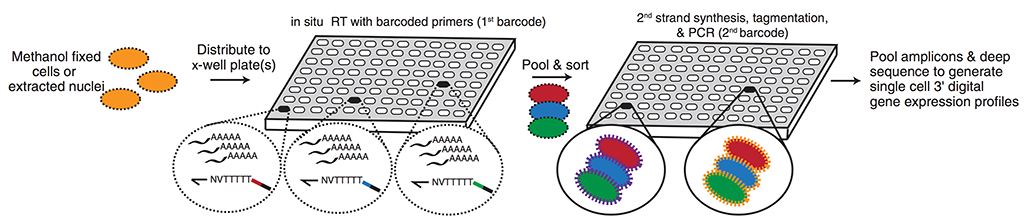

In [5]:
Image(filename = "/gpfs/class-info/hts_class1/1020/images/sci-RNA.png", width = 800)

* __SPLiT-seq__
    * split-pool ligation-based transcriptome sequencing, which uses combinatorial barcoding to profile single-cell transcriptomes without requiring the physical isolation of each cell

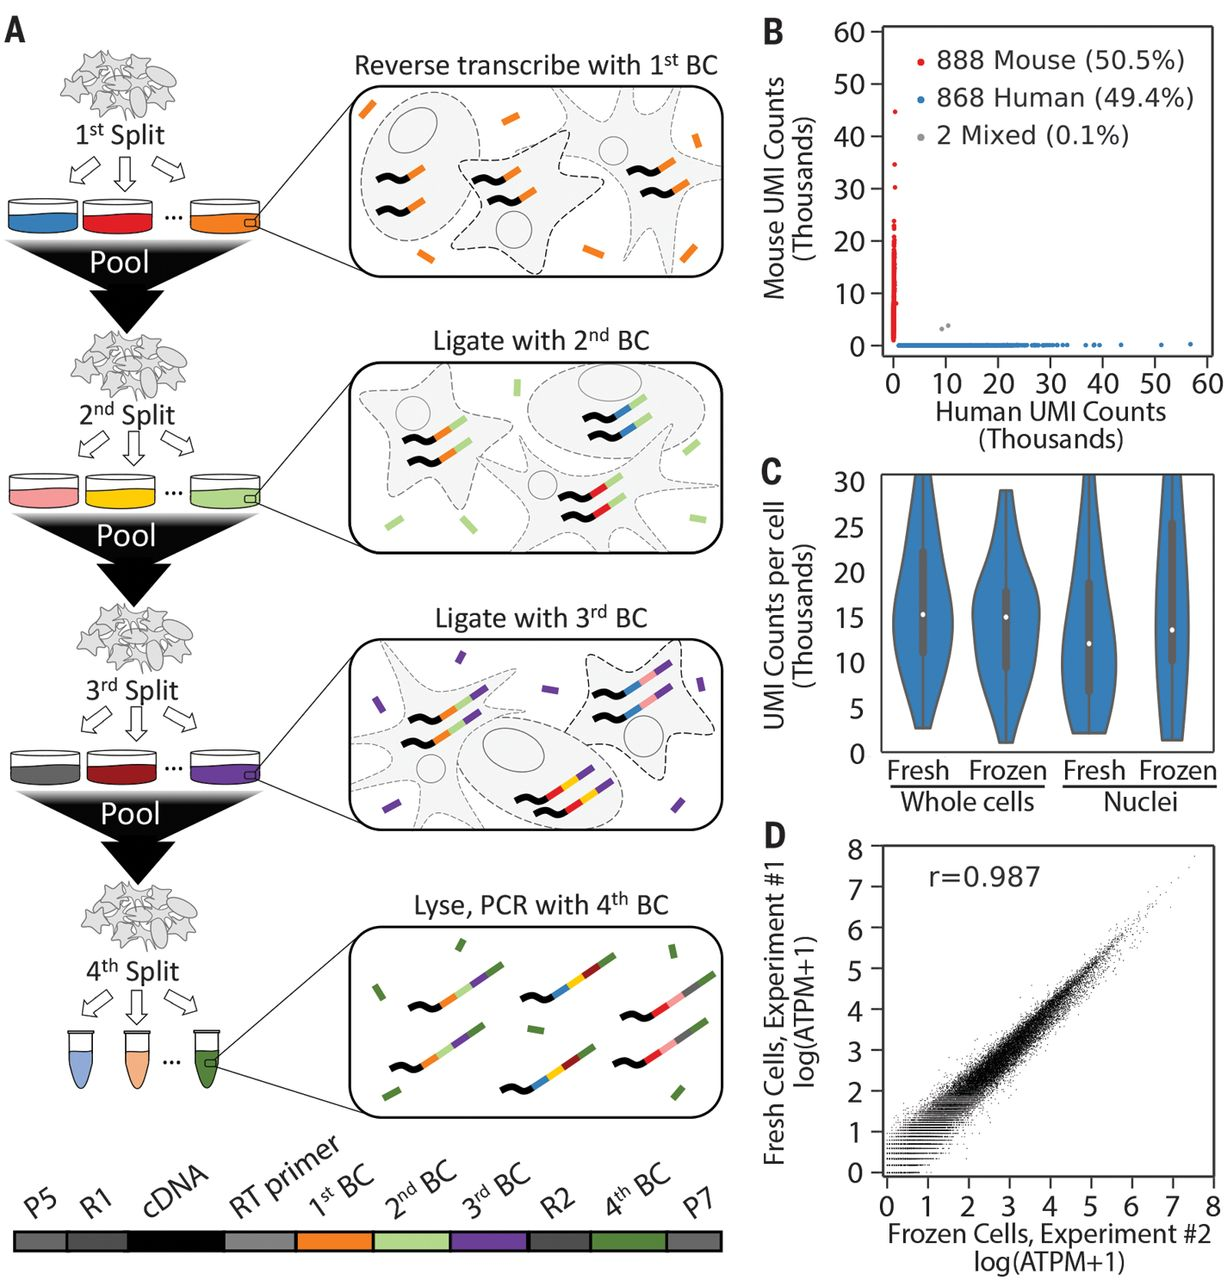

In [6]:
Image(filename = "/gpfs/class-info/hts_class1/1020/images/F1.large.jpg", width = 600)

## 10x resources

__support__

https://support.10xgenomics.com/

__data sets__

https://support.10xgenomics.com/single-cell-gene-expression/datasets

__cellranger tutorials__

https://support.10xgenomics.com/single-cell-gene-expression/software/pipelines/latest/using/tutorials

## raw sequence data

### fastq files 

1. @ followed by the read ID and possibly information about the sequencing run 
    * @ machine_id:lane:tile:x_coord:y_coord#index/read_# 
    * @machine_id:run number:flowcell ID:lane:tile:x-pos:y-pos read:is filtered:control number:index sequence 
2. sequenced bases
3. '+ (perhaps followed by the read ID again, or some other description)
4. quality scores for each base of the sequence (ASCII-encoded) 
    * Phred (+33) of the Q score, which is proportional to the probability that a base call is incorrect 
    * 10 corresponds to one error in every ten base calls (90% accuracy), 20 is 99% accuracy and 30 is 99.9% accuracy

#### from command line

> cd ~/esa_class1/fastqs/

> ls

> gunzip -c SC3_v3_NextGem_SI_CSP-Labeled_PBMCs_1K_gex_S1_L002_R2_001.fastq.gz | head -4

In [13]:
##bash code called within notebook
!ls ~/esa_class1/fastqs/*

/home/atimms/esa_class1/fastqs/SC3_v3_NextGem_SI_CSP-Labeled_PBMCs_1K_gex_S1_L002_I1_001.fastq.gz
/home/atimms/esa_class1/fastqs/SC3_v3_NextGem_SI_CSP-Labeled_PBMCs_1K_gex_S1_L002_R1_001.fastq.gz
/home/atimms/esa_class1/fastqs/SC3_v3_NextGem_SI_CSP-Labeled_PBMCs_1K_gex_S1_L002_R2_001.fastq.gz
/home/atimms/esa_class1/fastqs/SC3_v3_NextGem_SI_CSP-Labeled_PBMCs_1K_gex_S1_L003_I1_001.fastq.gz
/home/atimms/esa_class1/fastqs/SC3_v3_NextGem_SI_CSP-Labeled_PBMCs_1K_gex_S1_L003_R1_001.fastq.gz
/home/atimms/esa_class1/fastqs/SC3_v3_NextGem_SI_CSP-Labeled_PBMCs_1K_gex_S1_L003_R2_001.fastq.gz
/home/atimms/esa_class1/fastqs/SC3_v3_NextGem_SI_CSP-Labeled_PBMCs_1K_gex_S1_L004_I1_001.fastq.gz
/home/atimms/esa_class1/fastqs/SC3_v3_NextGem_SI_CSP-Labeled_PBMCs_1K_gex_S1_L004_R1_001.fastq.gz
/home/atimms/esa_class1/fastqs/SC3_v3_NextGem_SI_CSP-Labeled_PBMCs_1K_gex_S1_L004_R2_001.fastq.gz


In [8]:
!gunzip -c ~/esa_class1/fastqs/SC3_v3_NextGem_SI_CSP-Labeled_PBMCs_1K_gex_S1_L002_R2_001.fastq.gz | head -4

@A00519:643:HCMYWDSXY:2:1101:29821:1000 2:N:0:GTTCCTCA
CTTTGAGGCTGAGATGAGAAGATCACTTGAGACCAGGAGTTCAAGGTCAGCCTGGGCAGTATAGTGAGACCTCATCTCTACAAAAAAATTG
+
FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF:FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF:FFF,F

gzip: stdout: Broken pipe


## fastqc

* available at http://www.bioinformatics.babraham.ac.uk/projects/fastqc/
* examines quality scores and other properties of the individual reads (e.g. GC content) stored in a given FASTQ file
* flags the results with either “pass”, “warning”, or “fail” 
* not all “fail” verdicts mean that the sequencing should be repeated 
* RNA-seq data, tends to have clear signs of non-uniform base content distributions for the first 10-15 bps, attributed to the random hexamer priming step 

### run fastqc (from esa_class1 folder)

#### from command line 
> cd ~/esa_class1/

> module load biobuilds

> mkdir fastqc_results

> fastqc fastqs/SC3_v3_NextGem_SI_CSP-Labeled_PBMCs_1K_gex_S1_L002_R2_001.fastq.gz --extract -o fastqc_results

> cd fastqc_results/

> ls

> cd SC3_v3_NextGem_SI_CSP-Labeled_PBMCs_1K_gex_S1_L002_R2_001_fastqc

> ls

> less summary.txt

* can view html file locally


In [9]:
##within notebook (change 'atimms' to your id)
!mkdir /home/atimms/esa_class1/fastqc_results
!/cm/shared/apps/biobuilds/biobuilds-2017.11/bin/fastqc /home/atimms/esa_class1/fastqs/SC3_v3_NextGem_SI_CSP-Labeled_PBMCs_1K_gex_S1_L002_R2_001.fastq.gz --extract -o /home/atimms/esa_class1/fastqc_results

mkdir: cannot create directory ‘/home/atimms/esa_class1/fastqc_results’: File exists
Started analysis of SC3_v3_NextGem_SI_CSP-Labeled_PBMCs_1K_gex_S1_L002_R2_001.fastq.gz
Approx 5% complete for SC3_v3_NextGem_SI_CSP-Labeled_PBMCs_1K_gex_S1_L002_R2_001.fastq.gz
Approx 10% complete for SC3_v3_NextGem_SI_CSP-Labeled_PBMCs_1K_gex_S1_L002_R2_001.fastq.gz
Too many tiles (>500) so giving up trying to do per-tile qualities since we're probably parsing the file wrongly
Approx 15% complete for SC3_v3_NextGem_SI_CSP-Labeled_PBMCs_1K_gex_S1_L002_R2_001.fastq.gz
Approx 20% complete for SC3_v3_NextGem_SI_CSP-Labeled_PBMCs_1K_gex_S1_L002_R2_001.fastq.gz
Approx 25% complete for SC3_v3_NextGem_SI_CSP-Labeled_PBMCs_1K_gex_S1_L002_R2_001.fastq.gz
Approx 30% complete for SC3_v3_NextGem_SI_CSP-Labeled_PBMCs_1K_gex_S1_L002_R2_001.fastq.gz
^C


## mapping methods

* challenge is to map millions of reads accurately and in a reasonable time, despite the presence of sequencing errors, genomic variation and repetitive elements 
* employ various strategies that are meant to speed up the process (e.g., by indexing the reference genome) 
* find a balance between mapping fidelity and error tolerance 
* alignment generally use algorithms that follow the “seed-and-extend” approach

## seed-and-extend method

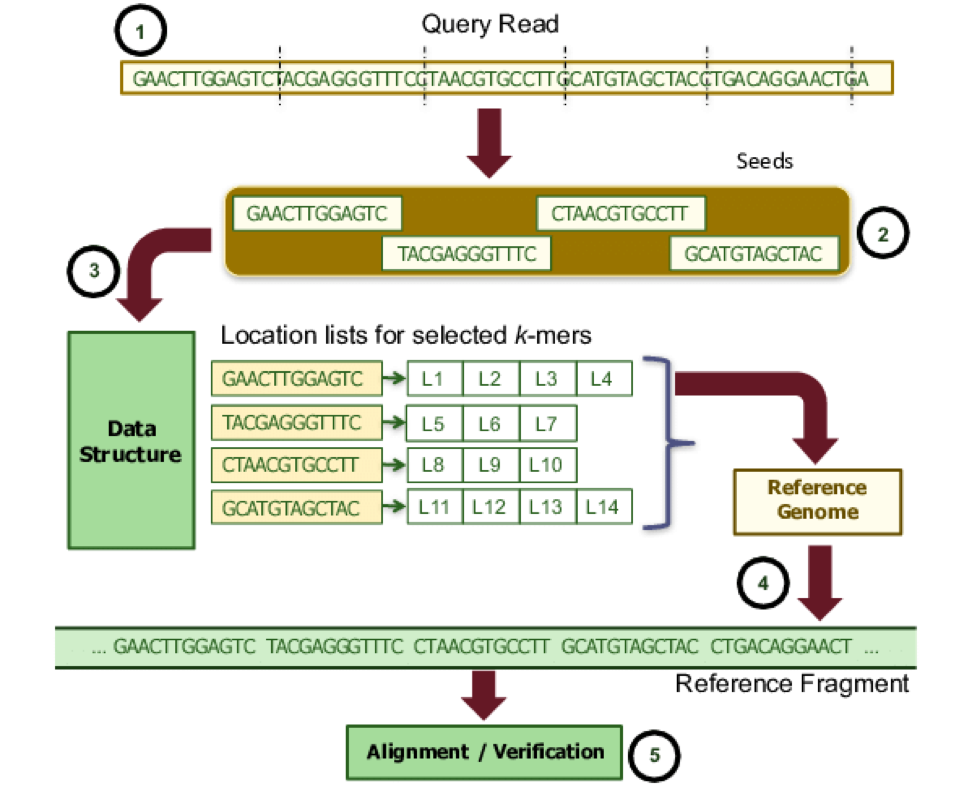

In [10]:
Image(filename = "/gpfs/class-info/hts_class1/1020/images/se.png", width = 600)

## mapping of RNA-Seq

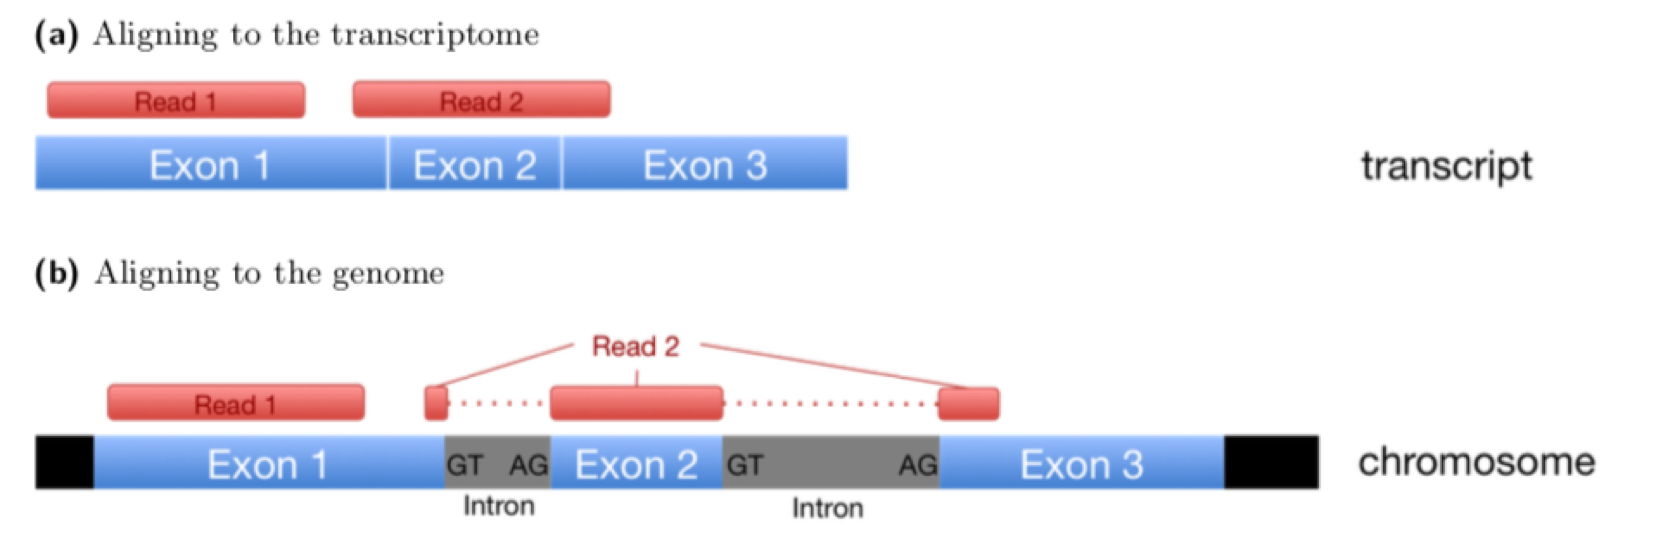

In [11]:
Image(filename = "/gpfs/class-info/hts_class1/1020/images/map1.png", width = 800)

## mapping of RNA-Seq – alignment free

* query and reference sequence are split up into unique k-mers of a specified length (here: 3) and the (dis)similarity is computed based on the number of shared words

* salmon and calisco are two common programs that use this strategy



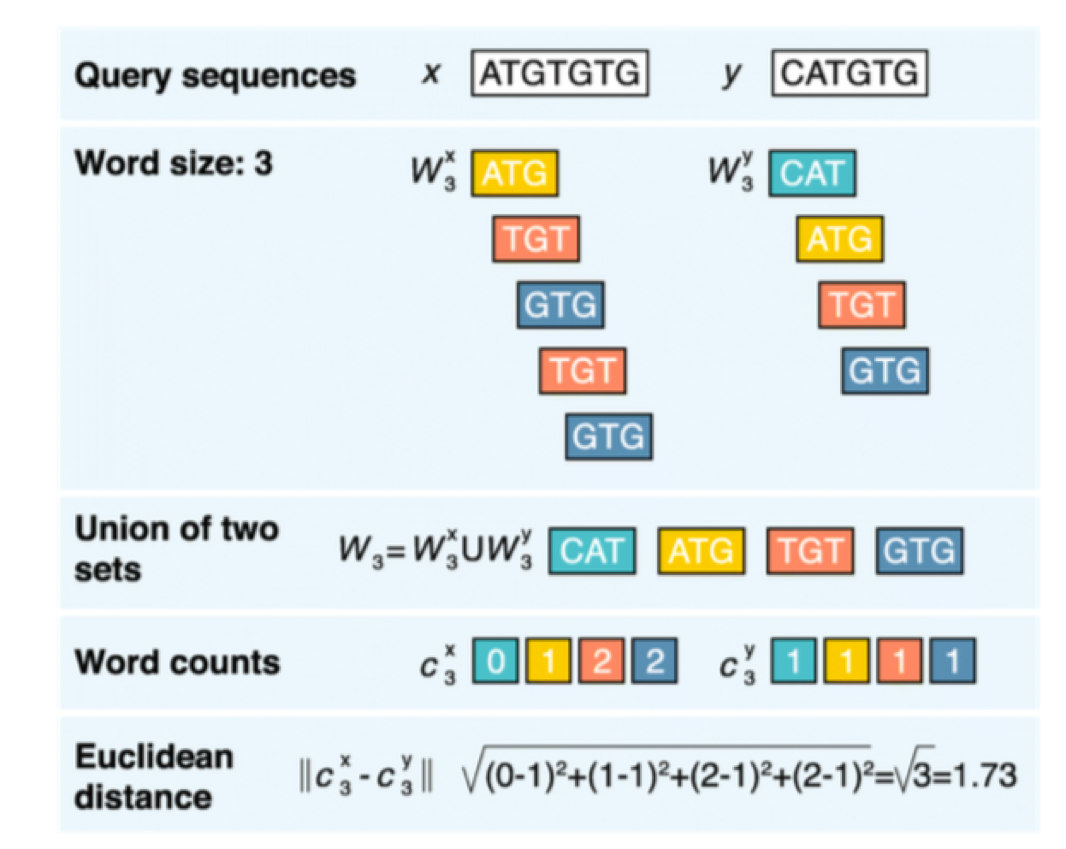

In [12]:
Image(filename = "/gpfs/class-info/hts_class1/1020/images/map2.png", width = 400)

## STAR – splice aware mapping to genome

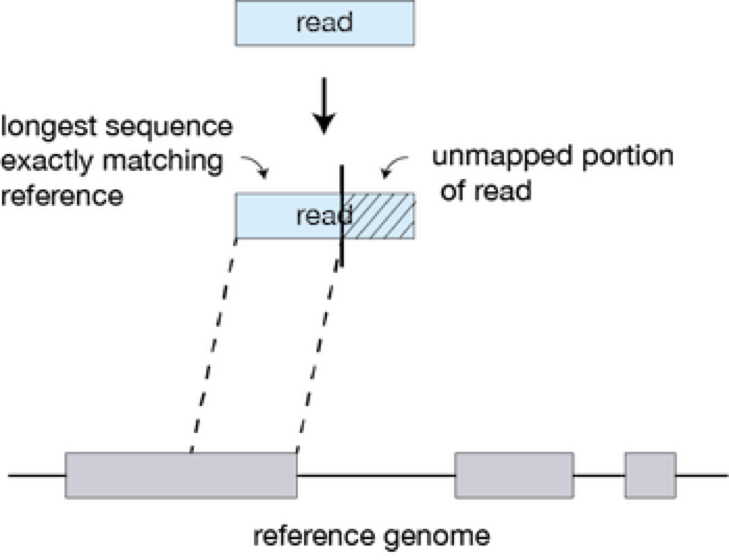

In [14]:
Image(filename = "/gpfs/class-info/hts_class1/1020/images/map3.png", width = 300)

* STAR will search for the longest sequence that exactly matches one or more locations on the reference genome. These are called the Maximal Mappable Prefixes (MMPs)

* The different parts of the read that are mapped separately are called ‘seeds’. So the first MMP that is mapped to the genome is called seed1.

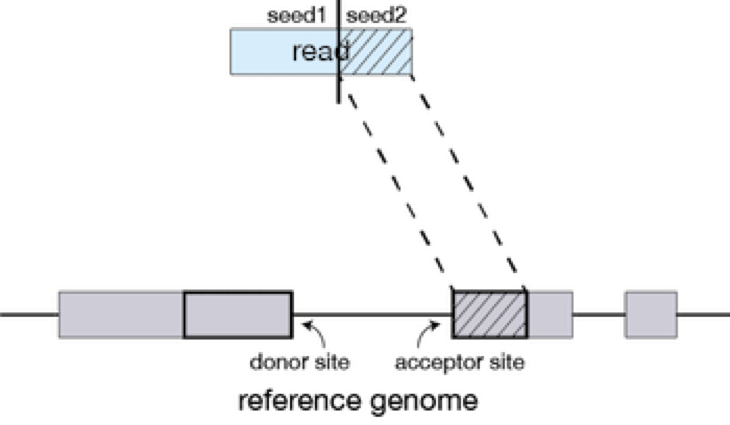

In [15]:
Image(filename = "/gpfs/class-info/hts_class1/1020/images/map4.png", width = 300)

* STAR will search again for the unmapped portion of the read to find  the next MMP, which will be seed2.

* This sequential searching of only the unmapped portions of reads underlies the efficiency of the STAR algorithm. STAR uses an uncompressed suffix array (SA) to efficiently search for the MMPs, this allows for quick searching against even the largest reference genomes. 

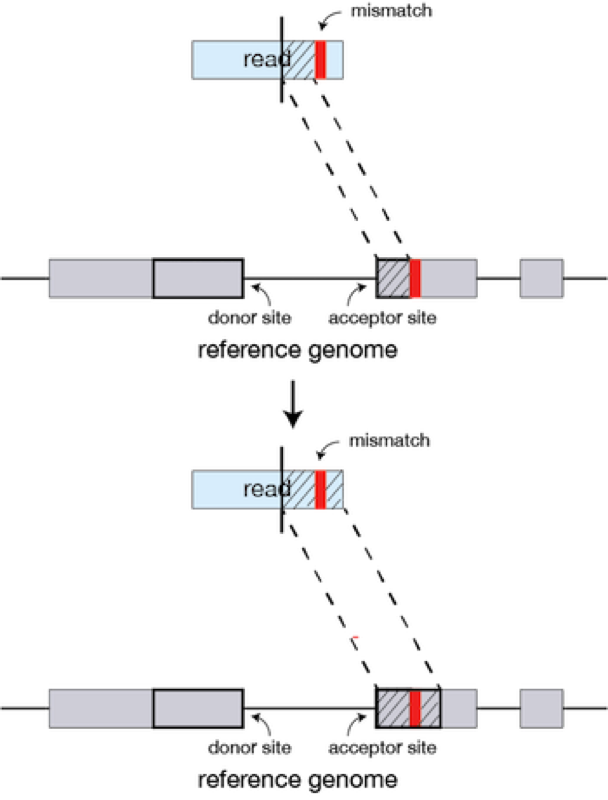

In [16]:
Image(filename = "/gpfs/class-info/hts_class1/1020/images/map5.png", width = 300)

* If STAR does not find an exact matching sequence for each part of the read due to mismatches or indels, the previous MMPs will be extended.

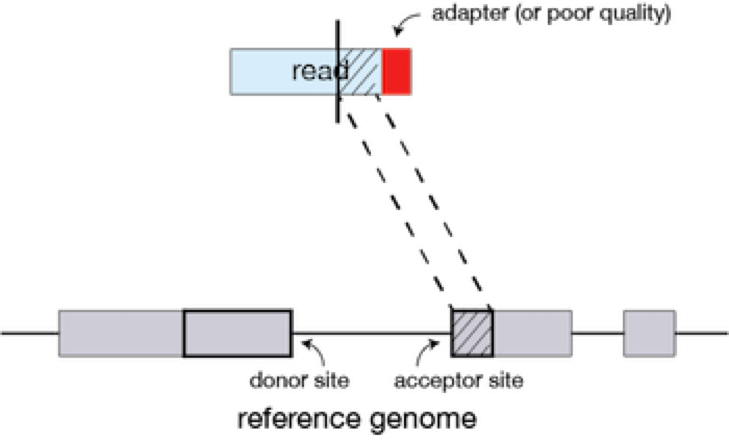

In [17]:
Image(filename = "/gpfs/class-info/hts_class1/1020/images/map6.png", width = 300)

* If extension does not give a good alignment, then the poor quality, or contaminating sequence will be soft clipped.

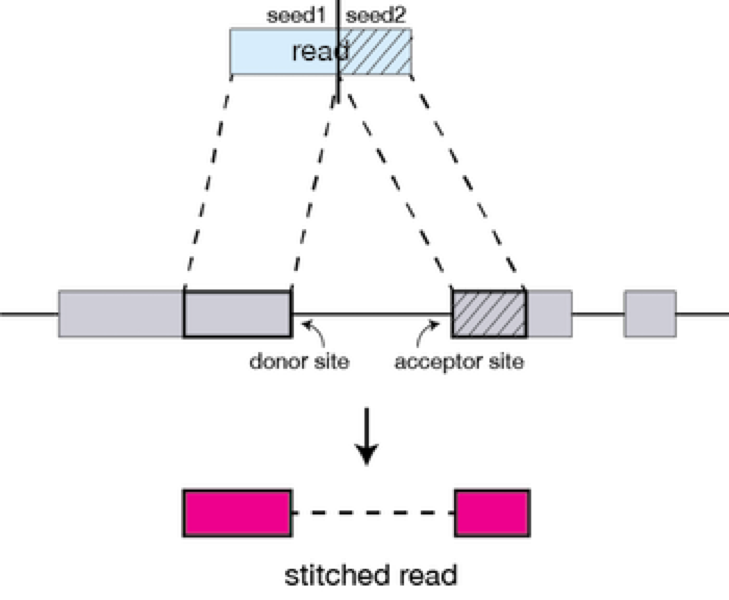

In [18]:
Image(filename = "/gpfs/class-info/hts_class1/1020/images/map7.png", width = 300)

* The separate seeds are stitched together to create a complete read by first clustering the seeds together based on proximity to a set of ‘anchor’ seeds, or seeds that are not multi-mapping.

* Then the seeds are stitched together based on the best alignment for the read (scoring based on mismatches, indels, gaps, etc.).

## reference files (fasta and GTF)

### 10x supplied reference directory:

> cd ~/esa_class1/refdata-cellranger-GRCh38-3.0.0/

> ls

### fasta file and index files

> head fasta/genome.fa

* single-line description, followed by lines of sequence data
* description line starts with >
* sequences may be protein sequences or nucleic acid sequences, and they can contain gaps or alignment characters 
* expected to be represented in the standard IUB/IUPAC amino acid and nucleic acid codes

> head fasta/genome.fa.fai 

* NAME: Name of this reference sequence
* LENGTH: Total length of this reference sequence, in bases
* OFFSET: Offset in the FASTA/FASTQ file of this sequence's first base
* LINEBASES: The number of bases on each line
* LINEWIDTH: The number of bytes in each line, including the newline
* QUALOFFSET: Offset of sequence's first quality within the FASTQ file

> ls star

* index files required to run STAR

### GTF file

> head genes/genes.gtf

* first 5 lines are a header then:

1. reference sequence
2. source
3. feature: required per gene "CDS", "start_codon", "stop_codon”, optional are "5UTR", "3UTR", "inter", "inter_CNS", "intron_CNS" and "exon".
4. start position
5. stop position
6. score
7. strand
8. frame
9. attributes: list of feature attributes as TAG=VALUE pairs, requires gene_id and transcript_id


In [ ]:
##can go within the notebook
! head ~/esa_class1/refdata-cellranger-GRCh38-3.0.0/fasta/genome.fa

## run cellranger count

* takes FASTQ files from cellranger mkfastq and performs alignment, filtering, barcode counting, and UMI counting

* it uses cellular barcodes to generate feature-barcode matrices, determine clusters, and perform gene expression analysis. 

* the count pipeline can take input from multiple sequencing runs on the same GEM well

#### via modules and command line:
> cd ~/esa_class1

> module load cellranger/3.1.0

> cellranger count

> cellranger count --fastqs=fastqs --id=cellranger_test --transcriptome=refdata-cellranger-GRCh38-3.0.0


In [ ]:
##within notebook (change 'atimms' to your id)
!/cm/shared/apps/cellranger/cellranger-3.1.0/cellranger count --fastqs=/home/atimms/esa_class1/fastqs --id=cellranger_test --transcriptome=/home/atimms/esa_class1/refdata-cellranger-GRCh38-3.0.0

## cellranger output

> cd cr_example/outs/

> ls

#### summary stats

* web_summary.html

* metrics_summary.csv

#### analysis files

> ls analysis

#### cloupe file

https://support.10xgenomics.com/single-cell-gene-expression/software/visualization/latest/what-is-loupe-cell-browser

#### BAM file

* possorted_genome_bam.bam


## SAM/BAM files

* The Sequence Alignment/Map (SAM) format is file format that describes the alignment of query sequences to a reference
* SAM files is human readable and can be compressed into the Binary Alignment/Map format (BAM)

### SAM header

* header section includes information about how the alignment was generated and stored 
* all lines in the header section begin with the @ character, followed by a two-letter record type abbreviation, followed by tag:value pairs
* Which tags are mandatory or optional for each record type and the format of the respective entries 
* For example, the “@SQ” line in the header section should be used to store information about the names and lengths of the reference sequences to which the reads were aligned 

### SAM alignment section

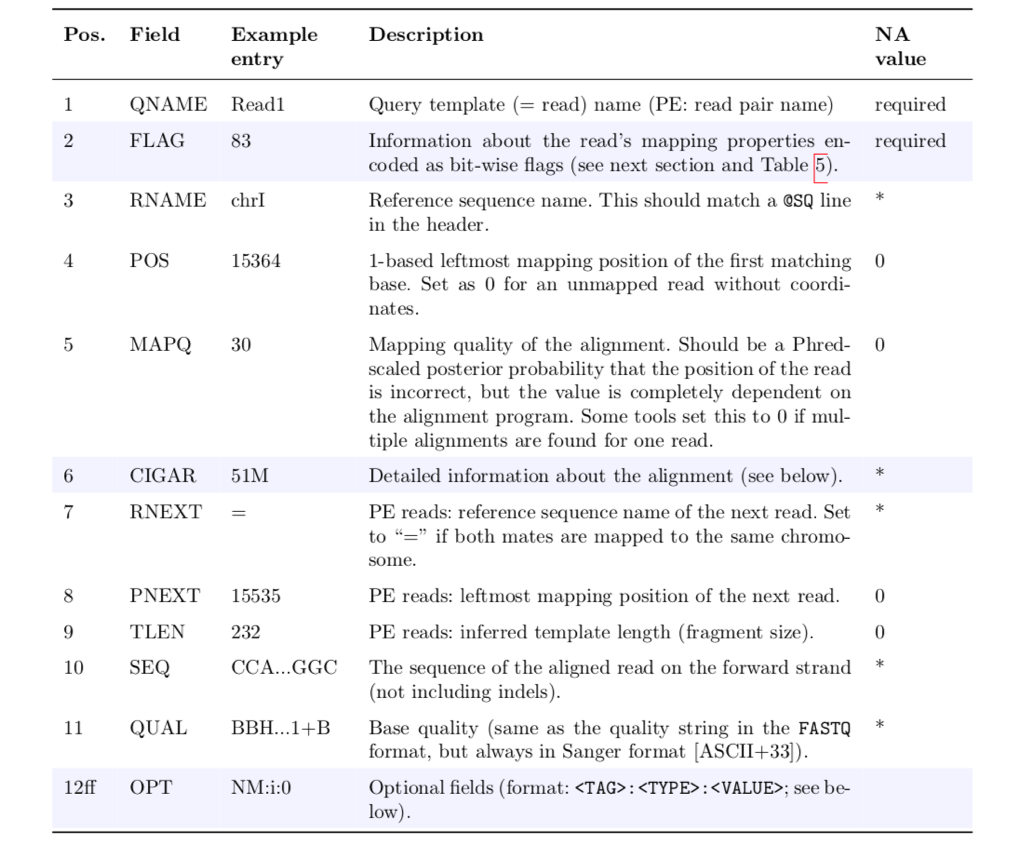

In [19]:
Image(filename = "/gpfs/class-info/hts_class1/1020/images/sam1.png", width = 500)

### SAM alignment section – FLAG field

* The FLAG field encodes various pieces of information about the individual read and it’s pair.
* It contains an integer that is generated from a sequence of Boolean bits (0, 1) and can be decoded here: https://broadinstitute.github.io/picard/explain-flags.html

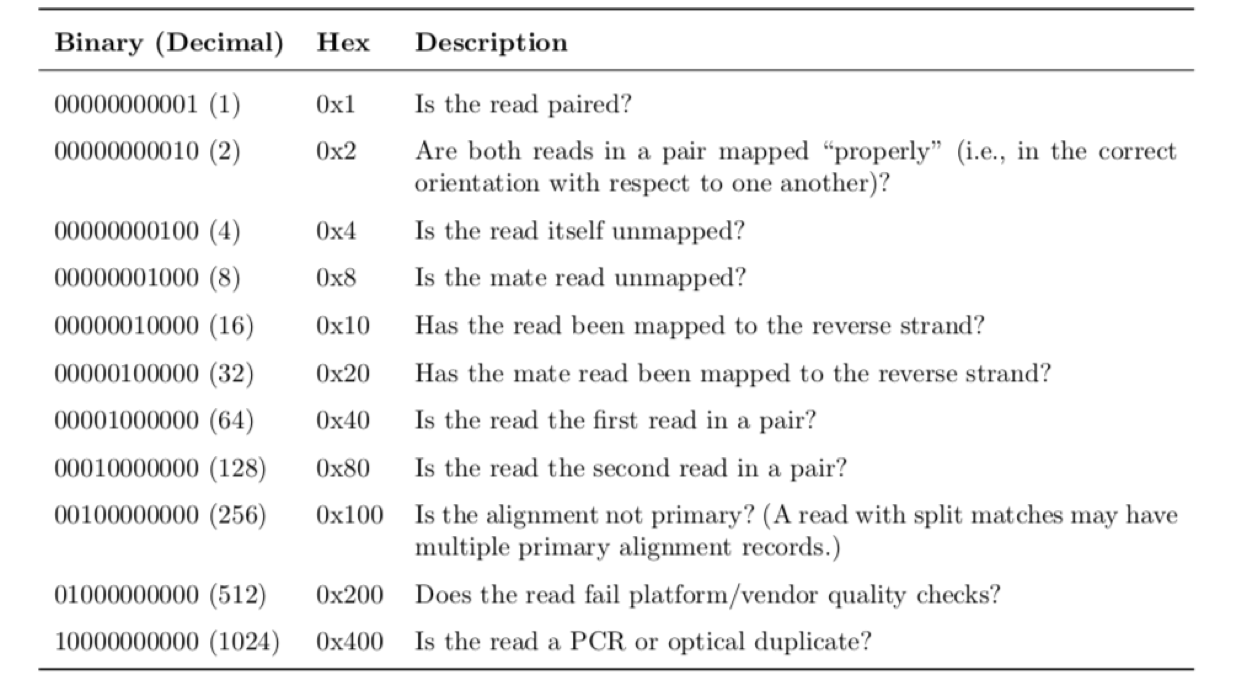

In [20]:
Image(filename = "/gpfs/class-info/hts_class1/1020/images/sam2.png", width = 500)

### SAM alignment section – CIGAR
* CIGAR string indicating which operations were necessary to map the read to the reference sequence at that particular locus


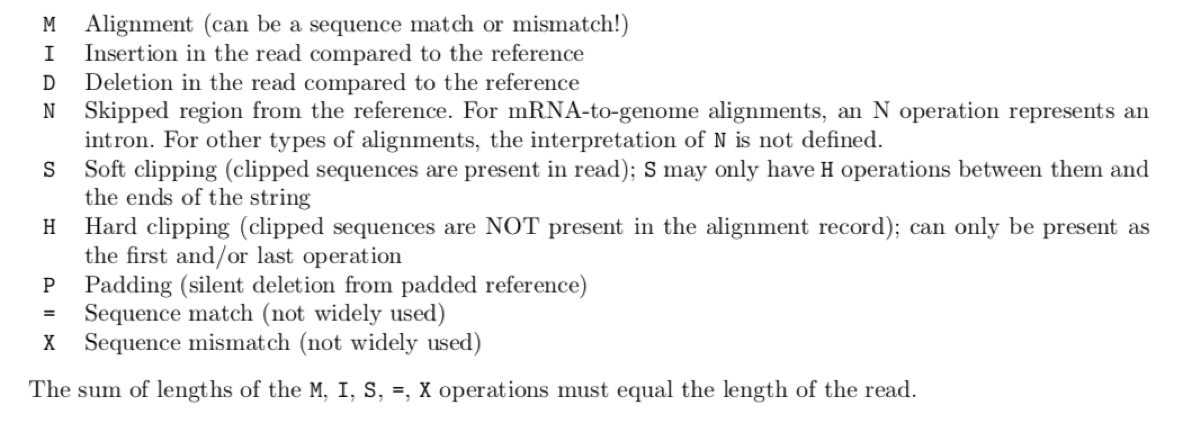

In [21]:
Image(filename = "/gpfs/class-info/hts_class1/1020/images/sam3.png", width = 500)

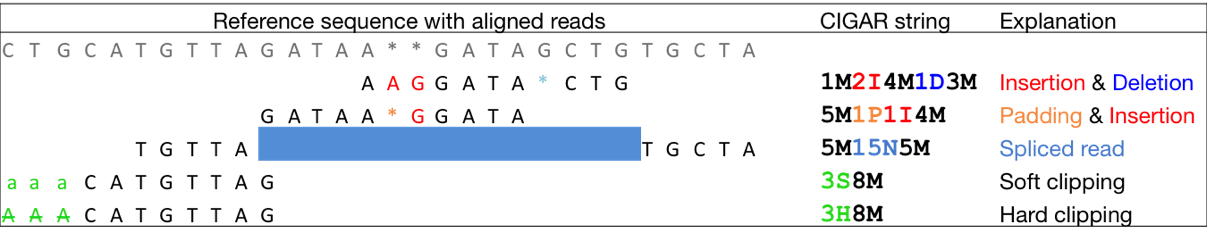

In [22]:
Image(filename = "/gpfs/class-info/hts_class1/1020/images/sam4.png", width = 500)

## viewing BAM file

> module load biobuilds

> cd ~/esa_class1/cr_example/outs

* not human readable
> head possorted_genome_bam.bam
* use samtools to view
> samtools view possorted_genome_bam.bam | head
* view just the header
> samtools view -H possorted_genome_bam.bam
* view with header
> samtools view -h possorted_genome_bam.bam | head
* convert to SAM
> samtools view -hO sam -o ko1.chr19Aligned.sortedByCoord.out.sam possorted_genome_bam.bam
* SAM file
> head ko1.chr19Aligned.sortedByCoord.out.sam
* summarize flag fields
> samtools flagstat possorted_genome_bam.bam


In [ ]:
## can use bash command
!/cm/shared/apps/biobuilds/biobuilds-2017.11/bin/samtools view -H /home/atimms/esa_class1/cr_example/outs/possorted_genome_bam.bam

In [ ]:
## can install samtools to use within Juypter
!pip install pysam

In [ ]:
import pysam
#samfile = pysam.AlignmentFile("possorted_genome_bam.bam", "rb")
pysam.view("-H", "/home/atimms/esa_class1/cr_example/outs/possorted_genome_bam.bam")

## counts and matrix files

* have filtered and raw data i.e. filtered_feature_bc_matrix and raw_feature_bc_matrix

* filtering:
    
    * select barcodes that likely contain cells and sum UMI counts for each barcode
    
    * select barcodes with total UMI count >10% of the 99th percentile of the expected recovered cells

* three files are produced:
    * barcodes.tsv.gz - cell level barcodes seen in this sample
    * features.tsv.gz - list of quantitated features (usually Ensembl genes)
    * matrix.mtx.gz - (sparse) matrix of counts for cells and features

> ls ~/esa_class1/cr_example/outs/filtered_feature_bc_matrix
> gunzip -c ~/esa_class1/cr_example/outs/filtered_feature_bc_matrix/barcodes.tsv.gz | head

In [ ]:
##check within notebook
!ls ~/esa_class1/cr_example/outs/filtered_feature_bc_matrix

In [ ]:
!gunzip -c ~/esa_class1/cr_example/outs/filtered_feature_bc_matrix/barcodes.tsv.gz | head

In [ ]:
!gunzip -c ~/esa_class1/cr_example/outs/filtered_feature_bc_matrix/features.tsv.gz | head

In [ ]:
!gunzip -c ~/esa_class1/cr_example/outs/filtered_feature_bc_matrix/matrix.mtx.gz | head